In [13]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Reading the Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [15]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [17]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [18]:
indep=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dep=dataset['Purchased']

In [19]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'splitter':['best','random']} 


grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 



Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\YAS\anaconda3\envs\project-1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\YAS\anaconda3\envs\project-1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\YAS\anaconda3\envs\project-1\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\YAS\anaconda3\envs\project-1\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

In [24]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)




In [25]:

from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}: 0.8950415075783873


In [26]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[79  6]
 [ 8 41]]


In [27]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        85
           1       0.87      0.84      0.85        49

    accuracy                           0.90       134
   macro avg       0.89      0.88      0.89       134
weighted avg       0.89      0.90      0.90       134



In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])


0.8830732292917168

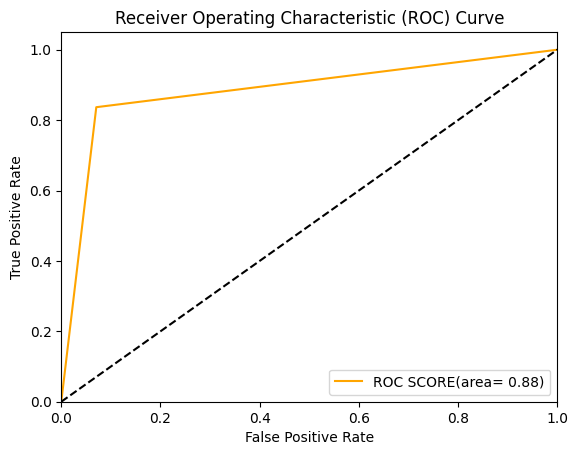

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
tpr,fpr,_ = roc_curve(y_test,grid.predict_proba(X_test)[:,1])
roc = auc(tpr,fpr)
plt.figure()
plt.plot(tpr,fpr, color= 'orange',label = 'ROC SCORE(area= {:.2f})'.format(roc))
plt.plot([0, 1], [0, 1], color='black',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
table=pd.DataFrame.from_dict(re)

In [60]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003657,0.002008,0.000000,0.000000,gini,auto,best,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.001849,0.001817,0.000000,0.000000,gini,auto,random,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.005263,0.002827,0.007799,0.001620,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.826263,0.868752,0.851527,0.851527,0.813179,0.842250,0.019876,4
3,0.003876,0.001472,0.008108,0.002733,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.849794,0.870047,0.815056,0.906166,0.887907,0.865794,0.031519,1
4,0.003606,0.002213,0.011444,0.005272,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.804764,0.870047,0.814409,0.832483,0.811321,0.826605,0.023585,7
5,0.004111,0.001068,0.007125,0.000555,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.782557,0.868752,0.777291,0.886792,0.961755,0.855430,0.069112,2
6,0.002169,0.000637,0.000000,0.000000,entropy,auto,best,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.001736,0.000635,0.000000,0.000000,entropy,auto,random,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.003126,0.001452,0.007008,0.002788,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.885356,0.831253,0.813179,0.832483,0.903610,0.853176,0.034893,3
9,0.004561,0.001170,0.006879,0.000487,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.867478,0.828959,0.741078,0.831098,0.886792,0.831081,0.050067,6


In [63]:
age_input=int(input("Age:"))
Estimated_sal=int(input("EstimatedSalary:"))
Gender=int(input("Enter Gender Male 1 or Female 0:"))

Age: 19
EstimatedSalary: 19000
Enter Gender Male 1 or Female 0: 1


In [64]:
Future_Prediction=grid.predict([[age_input,Estimated_sal,Gender]])# change the paramter,play with it.
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[1]
